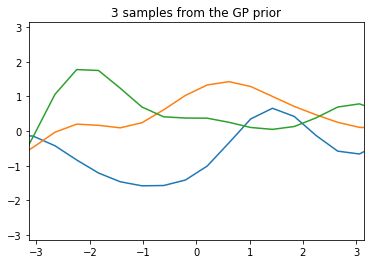

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from numpy.random import normal, uniform

# Test data
n = 50
Xtest = np.linspace(-10, 10, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-np.pi, np.pi, -np.pi, np.pi])
plt.title('3 samples from the GP prior')
plt.show()

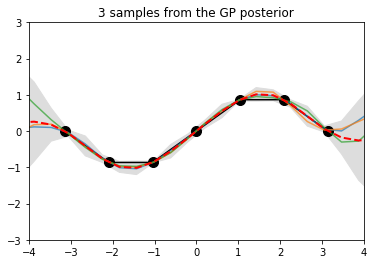

In [28]:
Xtrain = np.linspace(-np.pi,np.pi,7).reshape(7,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

plt.plot(Xtrain, ytrain, 'black', marker = 'o', ms=10, alpha = 1)
plt.plot(Xtest, f_post, alpha = 0.7)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, color = 'red', linestyle = 'dashed', lw=2)
plt.axis([-4, 4, -3, 3])
plt.title('3 samples from the GP posterior')
#pylab.ylim(-np.pi,np.pi)
#pylab.xlim(-np.pi,np.pi)
plt.show()


In [3]:
x1 = np.linspace(-5, 5, n).reshape(-1,1)
print(x1.flat)

In [4]:
x2 = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
print(x2)

[[-4]
 [-3]
 [-2]
 [-1]
 [ 1]]
